<a href="https://colab.research.google.com/github/eanchiquep/Machine_Learning_Google_Lab/blob/master/Deteccion_de_problemas_Cardiacos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine_learning_udemy/DATASETS
!ls

/content/drive/MyDrive/Colab Notebooks/Machine_learning_udemy/DATASETS
 Advertising.csv	       ecom-expense
 Athelete_Country_Map.csv      gender-purchase
 Athelete_Sports_Map.csv       heart.csv
 auto			       House-price
 bank			       Medals.csv
'Customer Churn Columns.csv'  'Tab Customer Churn Model.txt'
'Customer Churn Model.csv'     titanic3.csv
'Customer Churn Model.txt'     winequality-red.csv
 distributed-data


In [ ]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# ANALISIS EXPLORATORIO

In [ ]:
data.isnull().sum() # comprobamos valores nulos # el dataset no cuenta con valores nulos

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.shape # comprobamos el tamaño del dataset, el dataset cuenta con 303 entradas y 14 variables o features

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


REALIZAMOS LA PRUEBA PARA SELECCIONAR LAS COLUMNAS MAS REPRESENTATIVAS A TRAVES DE LA LIBRERIA RFE, ANALIZANDO EL AREA BAJO LA CURVA DE LA CURVA ROC, PARA CADA MODELO VARIANDO LA CANTIDAD DE VARIABLES, PARA SABER CON CUANTAS VARIABLES Y CON CUALES DEBO QUEDARME



In [ ]:
from sklearn.feature_selection import RFE 

X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
columns_feature = X.columns.tolist()

y = data['output']

support_models = []
scores = []

for i in range(1,len(columns_feature)+1):
    lr = LogisticRegression(max_iter=10000)
    rfe = RFE(lr, n_features_to_select=i)
    rfe.fit(X,y)

    proba = rfe.predict_proba(X)
    y_predict = proba[:,1]

    scores.append(roc_auc_score(y,y_predict))
    support_models.append(rfe.support_)

dictio = {}
dictio['Support_models'] = support_models
dictio['Auc_score'] = scores

In [ ]:
# Graficamos el valor del área bajo la curva de cada modelo vs el numero de features
rend_features_df = pd.DataFrame(dictio)
rend_features_df

,Support_models,Auc_score
0,"[False, False, False, False, False, False, Fal...",0.705665
1,"[False, True, False, False, False, False, Fals...",0.767896
2,"[False, True, False, False, False, False, Fals...",0.812275
3,"[False, True, False, False, False, False, Fals...",0.839350
4,"[False, True, False, False, False, False, Fals...",0.880764
5,"[False, True, True, False, False, False, False...",0.903733
6,"[False, True, True, False, False, False, False...",0.910870
7,"[False, True, True, False, False, False, True,...",0.912780
8,"[False, True, True, False, False, False, True,...",0.916381
9,"[False, True, True, True, False, False, True, ...",0.923057


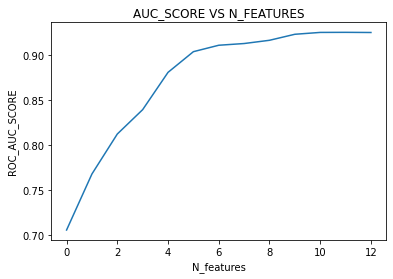

In [ ]:
plt.plot(scores)
plt.xlabel("N_features")
plt.ylabel("ROC_AUC_SCORE")
plt.title("AUC_SCORE VS N_FEATURES")
plt.show()

Podemos observar que para un numero superior a 5 features la mejora en el AUC del modelo no es muy significativo y que a partir de 9 features el AUC es practicamente constante.

In [ ]:
# Trabajaremos con los 9 features mas representativos del modelo.

n=8 # selecionamos el modelo correspondiente cuando posee 9 features selecionados

T_F_feature = list(rend_features_df.iloc[[n],0].tolist()[0])

In [ ]:
T_F_feature_DF = pd.DataFrame([columns_feature, T_F_feature], index=["column","T_F"]).T

In [ ]:
selected_features_df = T_F_feature_DF[T_F_feature_DF['T_F']==True]
selected_features = selected_features_df['column'].tolist()
print(selected_features)

['sex', 'cp', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


EVALUACIÓN DE DIFERENTES MODELOS TENIENDO EN CUENTA EL ROC_AUC

In [ ]:
models = {"LR" : LogisticRegression(max_iter=1000),
          "RF" : RandomForestClassifier(),
          "SVC" : SVC()}

random.seed = 10

from sklearn.model_selection import cross_val_score


model_behaivour = {}

for i,k in models.items():
    score_cv = cross_val_score(models[i],X,y.values.ravel(), cv=10, scoring='roc_auc')
    model_behaivour[i] = score_cv.mean()

model_behaivour

{'LR': 0.9037209114414996, 'RF': 0.9057975113122172, 'SVC': 0.7448792016806725}

Si observamos el modelo de clasificación de Regresión logistica tiene un AUC casi igual al modelo de Random Forest, mientras que el Suport Vector Clasiffier es el que peor se comporta

Seleccionaremos el modelo de clasificación logistica debido a su simplicidad.

# Ahora Identificaremos el Mejor threshold o umbral de decisión del modelo 


In [ ]:
lr.fit(X_train,y_train)
proba = lr.predict_proba(X_test)
y_proba = proba[:,1]

In [ ]:
X_1 = data[selected_features]

# realizamos partición del datasets en entrenamiento y testing, inicialmente con una validación de 75 training y 25 testing y posteriormente con K-fold cross-validation corroboramos que tan bien generaliza el modelo
X_train, X_test, y_train, y_test = train_test_split(X_1,y, test_size=0.25,random_state=10)

lr = LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import roc_curve

especi_1, sensib, threshold_1 = roc_curve(y_test,y_proba)

roc_table = pd.DataFrame([especi_1,sensib,threshold_1], index=['1-Especificidad','Sensibilidad','threshold']).T
roc_table['mean_sensibility-specifity'] = ((1 - roc_table['1-Especificidad']) + roc_table['Sensibilidad'])/2


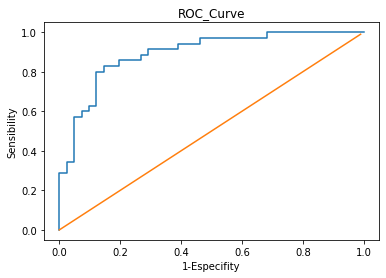

In [ ]:
plt.plot(especi_1,sensib)
plt.ylabel("Sensibility")
plt.xlabel('1-Especifity')
plt.title('ROC_Curve')

x= [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)

Graficamente podemos observar que el mejor punto de sensibilidad vs 1-especificidad es de (0.146341,0.828571) respectivamente, para un threshold de 0.661686, en donde tendremos la mejor confianza del modelo para precedir tanto casos positivos y negativos

AHORA PROBEMOS LOS RESULTADOS APLICANDO DICHO UMBRAL

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
proba = lr.predict_proba(X_test)
y_proba = proba[:,1]

array([0.06898014, 0.4176155 , 0.36343177, 0.7007879 , 0.11768229,
       0.6743042 , 0.79204846, 0.64436724, 0.89619023, 0.04878697,
       0.93184903, 0.04633108, 0.59672852, 0.4468423 , 0.08734056,
       0.42423599, 0.02561425, 0.00927772, 0.89928404, 0.09263493,
       0.04765028, 0.89935586, 0.74196228, 0.94083635, 0.13498805,
       0.08915983, 0.01495013, 0.12668475, 0.97263183, 0.00522308,
       0.92821102, 0.12854985, 0.02300183, 0.23378593, 0.01227115,
       0.13587902, 0.81524057, 0.44732222, 0.82199299, 0.06793529,
       0.15767396, 0.04042571, 0.72860795, 0.66989345, 0.96681467,
       0.4456775 , 0.64395916, 0.83180085, 0.78859229, 0.77405205,
       0.34717134, 0.81926474, 0.04441373, 0.35651844, 0.98770856,
       0.68507547, 0.73879971, 0.81853804, 0.01743683, 0.03963501,
       0.77915665, 0.85129305, 0.88537007, 0.08468979, 0.91834402,
       0.73977634, 0.90812025, 0.6102558 , 0.01770409, 0.89920864,
       0.81926474, 0.7315739 , 0.66168627, 0.61684885, 0.02591

In [ ]:
prob_df = pd.DataFrame(y_proba)
threshold = 0.6616

prob_df['Prediction']=np.where(prob_df[0] >= threshold, 1,0)
prob_df['y_true'] = y_test.to_list()

pd.crosstab('y_true',)

In [ ]:
confusion_matrix = pd.crosstab(prob_df.Prediction,prob_df.y_true)
confusion_matrix

y_true,0,1
Prediction,,
0,35,6
1,6,29


In [ ]:
TN = confusion_matrix.iloc[0,0]
TP = confusion_matrix.iloc[1,1]
FP = confusion_matrix.iloc[1,0]
FN = confusion_matrix.iloc[0,1]

In [ ]:
y_test.shape

(76,)

In [ ]:
Precision = TP/(TP+FP)
Recall = TP/(TP + FN)
Accuracy = (TP+TN)/ (TP+TN+FP+FN)
F1=2*(Precision * Recall/ Precision + Recall )

In [ ]:
print('Precisión :', Precision)
print('Recall :', Recall)
print('Accuracy :', Accuracy)
print('F1 :', F1)

Precisión : 0.8285714285714286
Recall : 0.8285714285714286
Accuracy : 0.8421052631578947
F1 : 3.3142857142857145


CONCLUSIONES: Si miramos el recall, el algoritmo tiene una alta probabilidad de identificar casos positivos, en este sentido personas con problemas cardiacos con un 82%

De esos casos identificados el 82.8 % son realmente positivos. esto lo podemos revisar observando la Precisión del modelo.

